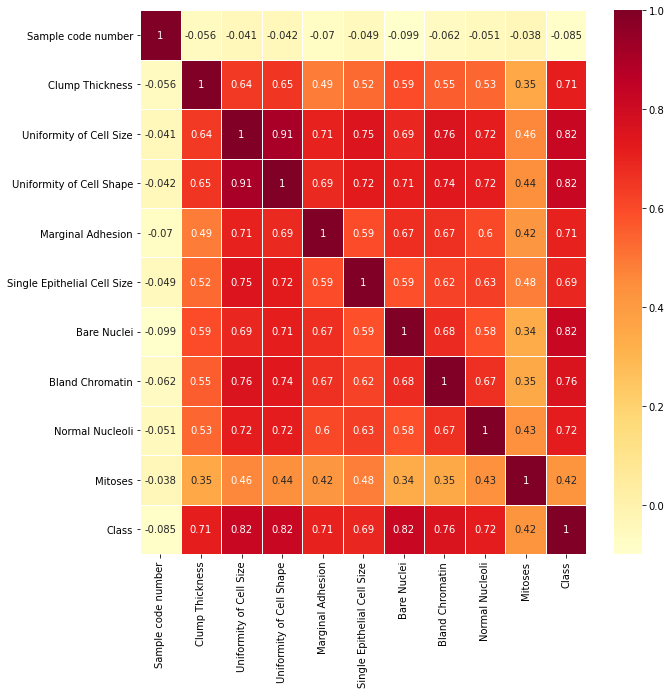

[[84  3]
 [ 3 47]]
Accuracies:96.70 %
Standard deviation:1.97 %
Final Accuracy:94.73 %


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("breast_cancer.csv")
df.shape

#heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),cmap="YlOrRd",annot=True,ax=ax,linewidths=.5)
plt.show()

#checking null values
pd.isnull(df).sum()

#fixing X and y
X=df.iloc[:, 1:-1].values #dropping first col
y=df.iloc[:,-1].values

#splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=.2,random_state=0)

#training logistic reg model on training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

#predicting test set result
y_pred=classifier.predict(X_test)

#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


#k-fold
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
print("Accuracies:{:.2f} %".format(accuracies.mean()*100))
print("Standard deviation:{:.2f} %".format(accuracies.std()*100))
print("Final Accuracy:{:.2f} %".format((accuracies.mean()-accuracies.std())*100))